<ipython-input-5-ef21b464de38>:18: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  circle = skimage.draw.circle(600, 190, radius=95, shape=image.shape[:2])


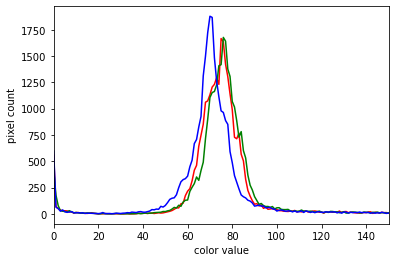

In [5]:

import sys
import skimage.io
import skimage.viewer
import skimage.draw
import numpy as np
from matplotlib import pyplot as plt

filename = 'results_L3.jpg'


# read original image, in full color, based on command
# line argument
image = skimage.io.imread(fname=filename)


# create a circular mask to select the 7th well in the first row

mask = np.zeros(shape=image.shape[0:2], dtype="bool")
circle = skimage.draw.circle(600, 190, radius=95, shape=image.shape[:2])
mask[circle] = 1

# just for display:
# make a copy of the image, call it masked_image, and
# use np.logical_not() and indexing to apply the mask to it

masked_img = image[:]
masked_img[np.logical_not(mask)] = 0


dot = filename.index(".")
binary_file_name = filename[:dot] + "-masked" + filename[dot:]
#skimage.io.imsave(fname=binary_file_name, arr=skimage.img_as_ubyte(masked_img))

# list to select colors of each channel line
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 150])
for (channel_id, c) in zip(channel_ids, colors):
    # change this to use your circular mask to apply the histogram
    # operation to the 7th well of the first row

    histogram, bin_edges = np.histogram(
        image[:, :, channel_id][mask], bins=256, range=(0, 256)
    )

    plt.plot(histogram, color=c)

plt.xlabel("color value")
plt.ylabel("pixel count")

plt.show()